In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
raw_data = pd.read_csv("heart.csv")
print(raw_data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('output', axis=1))
scaled_features = pd.DataFrame(scaler.transform(raw_data.drop('output', axis=1)),columns=raw_data.columns[:-1])
print(scaled_features.head())

        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, raw_data['output'], random_state=0)
Y_train = to_categorical(Y_train, 3)
Y_test = to_categorical(Y_test, 3)

In [5]:
model = keras.Sequential([
    layers.Dense(32, input_dim = 13,activation="relu"),
    layers.Dense(3, input_dim = 13, activation="softmax")
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 1.3673 - accuracy: 0.1630
Epoch 2/30
8/8 [==============================] - 0s 857us/step - loss: 1.2164 - accuracy: 0.2599
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 1.1050 - accuracy: 0.3480
Epoch 4/30
8/8 [==============================] - 0s 997us/step - loss: 1.0106 - accuracy: 0.4758
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.9349 - accuracy: 0.5683
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.8728 - accuracy: 0.6520
Epoch 7/30
8/8 [==============================] - 0s 1000us/step - loss: 0.8184 - accuracy: 0.6784
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.7707 - accuracy: 0.7004
Epoch 9/30
8/8 [==============================] - 0s 858us/step - loss: 0.7360 - accuracy: 0.7181
Epoch 10/30
8/8 [==============================] - 0s 970us/step - loss: 0.7028 - accuracy: 0.7225
Epoch 11/30
8/8 [===========

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4807489216327667
Test accuracy: 0.8421052694320679


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow

from pathlib import Path
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [10]:
generator = ImageDataGenerator()
batches   = generator.flow_from_directory(r'C:\Users\ultad\img\training\training')

Found 1098 images belonging to 10 classes.


In [11]:
def loadImages(path):
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpeg') or file.endswith('.jpg') or file.endswith('.png')])
    return image_files

In [12]:
n0_images=loadImages(r'C:\Users\ultad\img\training\training\n0')
n1_images=loadImages(r'C:\Users\ultad\img\training\training\n1')
n2_images=loadImages(r'C:\Users\ultad\img\training\training\n2')
n3_images=loadImages(r'C:\Users\ultad\img\training\training\n3')
n4_images=loadImages(r'C:\Users\ultad\img\training\training\n4')

In [13]:
train = Path(r'C:\Users\ultad\img\training\training')
test = Path(r'C:\Users\ultad\img\validation\validation')

In [14]:
def ps(images,images_num):
    for i in range(0,images_num):
        plt.figure(figsize = (20,4))
        plt.imshow(plt.imread(images[i]))
        if images ==n0_images:
            plt.title("alouatta_palliata")
        if images ==n1_images:
            plt.title("erythrocebus_patas")
        if images ==n2_images:
            plt.title("cacajao_calvus")
        if images ==n3_images:
            plt.title("macaca_fuscata")
        if images ==n4_images:
            plt.title("cebuella_pygmea")
        

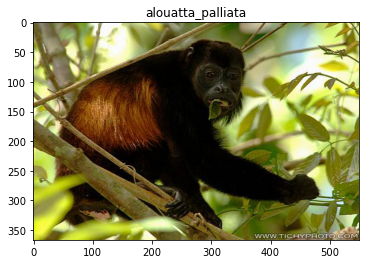

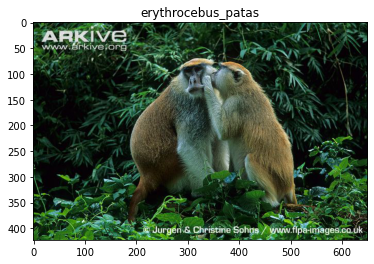

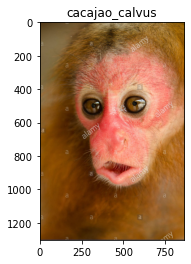

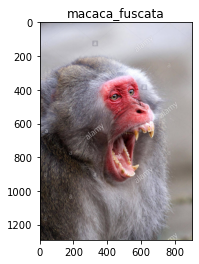

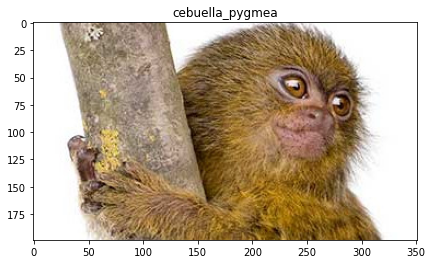

In [15]:
ps(n0_images,1)
ps(n1_images,1)
ps(n2_images,1)
ps(n3_images,1)
ps(n4_images,1)

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        test,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [17]:
model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(150,activation='relu'))


model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 150)              

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [20]:
model.fit_generator(train_generator, epochs = 10 ,validation_data=validation_generator,callbacks=early_stop,verbose = 1)

<ipython-input-20-9f4142377d76>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs = 10 ,validation_data=validation_generator,callbacks=early_stop,verbose = 1)


Epoch 1/10
35/35 [==============================] - 31s 897ms/step - loss: 2.2389 - accuracy: 0.2077 - val_loss: 2.0073 - val_accuracy: 0.3750
Epoch 2/10
35/35 [==============================] - 29s 819ms/step - loss: 1.7949 - accuracy: 0.3780 - val_loss: 1.6311 - val_accuracy: 0.4228
Epoch 3/10
35/35 [==============================] - 30s 863ms/step - loss: 1.4710 - accuracy: 0.5046 - val_loss: 1.4626 - val_accuracy: 0.5000
Epoch 4/10
35/35 [==============================] - 29s 842ms/step - loss: 1.3055 - accuracy: 0.5483 - val_loss: 1.4337 - val_accuracy: 0.5184
Epoch 5/10
35/35 [==============================] - 29s 847ms/step - loss: 1.1961 - accuracy: 0.5883 - val_loss: 1.2681 - val_accuracy: 0.5478
Epoch 6/10
35/35 [==============================] - 29s 829ms/step - loss: 1.0892 - accuracy: 0.6439 - val_loss: 1.1570 - val_accuracy: 0.6434
Epoch 7/10
35/35 [==============================] - 29s 838ms/step - loss: 1.0010 - accuracy: 0.6694 - val_loss: 1.1167 - val_accuracy: 0.6471

In [21]:
loses=pd.DataFrame(model.history.history)
print(loses.head())

       loss  accuracy  val_loss  val_accuracy
0  2.238923  0.207650  2.007337      0.375000
1  1.794909  0.377960  1.631126      0.422794
2  1.470995  0.504554  1.462641      0.500000
3  1.305520  0.548270  1.433700      0.518382
4  1.196053  0.588342  1.268133      0.547794


<AxesSubplot:>

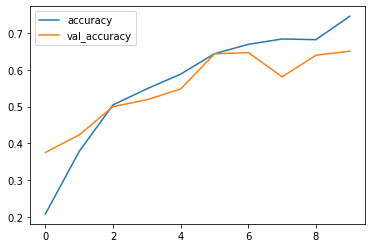

In [22]:
loses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

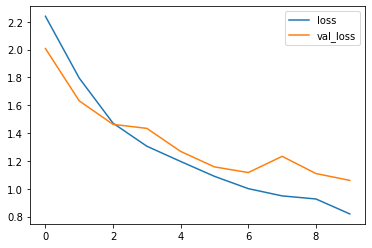

In [23]:
loses[['loss','val_loss']].plot()

In [24]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Dropout

from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("IMDB Dataset.csv", names=['review', 'sentiment'], header=0)

In [26]:
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [27]:
Review_lenghts = list(map(len, data.review.values))
print('Max len ',np.max(Review_lenghts))
print('Min len ', np.min(Review_lenghts))
print('Mean size ',np.mean(Review_lenghts))
print('Median size ',np.median(Review_lenghts))

Max len  13704
Min len  32
Mean size  1309.43102
Median size  970.0


In [28]:
print(data.sentiment.value_counts())

negative    25000
positive    25000
Name: sentiment, dtype: int64


In [29]:
dictionary_length = 1000
input_length = 100

tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(data.review.values)

In [30]:
post_seq = tokenizer.texts_to_sequences(data.review.values)

In [31]:
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)

In [32]:
X = post_seq_padded
X_array = np.array(X)
Y = data['sentiment'].values
Y = 1*(Y=='positive')
Y_array = np.array(Y)

x, y = shuffle(X_array, Y_array, random_state=23)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [34]:
model2 = Sequential()
model2.add(Embedding(dictionary_length, 2, input_length=input_length))
model2.add(Dense(32,activation="relu"))
model2.add(Dense(32,activation="relu"))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            2000      
                                                                 
 dense_4 (Dense)             (None, 100, 32)           96        
                                                                 
 dense_5 (Dense)             (None, 100, 32)           1056      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          1568      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)              

In [35]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history2 = model2.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
110/110 [==============================] - 15s 111ms/step - loss: 0.6949 - accuracy: 0.5034 - val_loss: 0.6938 - val_accuracy: 0.5049
Epoch 2/5
110/110 [==============================] - 11s 101ms/step - loss: 0.6919 - accuracy: 0.5205 - val_loss: 0.6911 - val_accuracy: 0.5298
Epoch 3/5
110/110 [==============================] - 11s 102ms/step - loss: 0.6789 - accuracy: 0.5575 - val_loss: 0.6635 - val_accuracy: 0.5889
Epoch 4/5
110/110 [==============================] - 12s 106ms/step - loss: 0.6249 - accuracy: 0.6467 - val_loss: 0.5824 - val_accuracy: 0.6890
Epoch 5/5
110/110 [==============================] - 11s 101ms/step - loss: 0.5537 - accuracy: 0.7157 - val_loss: 0.4847 - val_accuracy: 0.7677


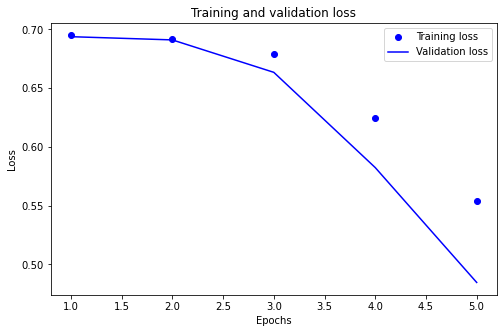

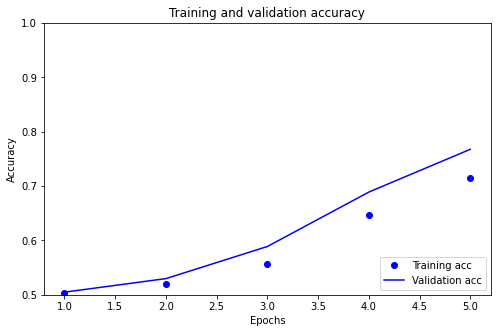

In [37]:
history_dict = history2.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(8,5))
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()